In [1]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [2]:
# get data ready
df = pd.read_csv("06-study_hours_grades.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   study_hours  50 non-null     float64
 1   grade        50 non-null     float64
dtypes: float64(2)
memory usage: 932.0 bytes


In [4]:
X = torch.tensor(df['study_hours'].values, dtype=torch.float32).unsqueeze(1)
y = torch.tensor(df['grade'].values, dtype=torch.float32).unsqueeze(1)

# we do this because we are going to use nn.Linear which expects float32 rather than other dtype in its weights
# also it expects 2D inputs when using nn.Linear. (batch_size, in_features) and if do not unsquueze it, it won't have that dimension
# just do it without unsquueze and see what happens in the training loop?

In [5]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

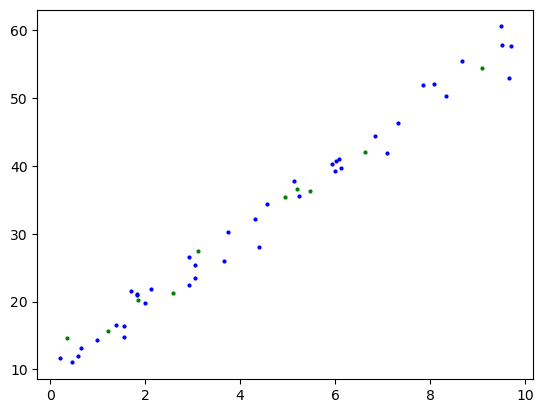

In [6]:
plt.scatter(X_train, y_train, c="b", s=4, label="Training data")
plt.scatter(X_test, y_test, c="g", s=4, label="Testing data")
plt.show()

In [7]:
import torch.nn as nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, 
                                      out_features=1) 
    
    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.linear_layer(x)

# in models we will learn how to make it multiple layers, add activation functions etc in upcoming sections
# we are now making a very simple regression using nn.Linear. if i have that kind of data in real life, i'd use sklearn and solve this with ml simply
# however we are still practicing anns in the most simplified way. 

In [8]:
torch.manual_seed(42)
model = LinearRegressionModel()
model = torch.compile(model)

In [9]:
model

OptimizedModule(
  (_orig_mod): LinearRegressionModel(
    (linear_layer): Linear(in_features=1, out_features=1, bias=True)
  )
)

In [10]:
model.state_dict()

OrderedDict([('_orig_mod.linear_layer.weight', tensor([[0.7645]])),
             ('_orig_mod.linear_layer.bias', tensor([0.8300]))])

In [11]:
#nn.Linear() layer created a random weight and bias parameter for us

In [12]:
# let's create the optimizer and loss function again

In [13]:
loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [14]:
epochs = 120

for epoch in range(epochs):
    
    model.train() 

    # 1. Forward pass
    y_pred = model(X_train)

    # 2. loss calculation
    loss = loss_fn(y_pred, y_train)

    # 3. reset optimizer
    optimizer.zero_grad()

    # 4. backward prop
    loss.backward()

    # 5. optimize the weights
    optimizer.step()

    # Test steps
    model.eval() 
    with torch.inference_mode():
        test_pred = model(X_test)
        # 2. test loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 5 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 965.6339111328125 | Test loss: 160.6202850341797
Epoch: 5 | Train loss: 22.257577896118164 | Test loss: 27.251602172851562
Epoch: 10 | Train loss: 21.1369571685791 | Test loss: 25.892608642578125
Epoch: 15 | Train loss: 20.168926239013672 | Test loss: 24.743694305419922
Epoch: 20 | Train loss: 19.254438400268555 | Test loss: 23.654788970947266
Epoch: 25 | Train loss: 18.390506744384766 | Test loss: 22.621475219726562
Epoch: 30 | Train loss: 17.574350357055664 | Test loss: 21.640789031982422
Epoch: 35 | Train loss: 16.80331802368164 | Test loss: 20.709945678710938
Epoch: 40 | Train loss: 16.07491683959961 | Test loss: 19.82631492614746
Epoch: 45 | Train loss: 15.38679027557373 | Test loss: 18.987407684326172
Epoch: 50 | Train loss: 14.736712455749512 | Test loss: 18.190872192382812
Epoch: 55 | Train loss: 14.122581481933594 | Test loss: 17.434463500976562
Epoch: 60 | Train loss: 13.54240608215332 | Test loss: 16.71609115600586
Epoch: 65 | Train loss: 12.9943056106

In [15]:
print(model.state_dict())

OrderedDict({'_orig_mod.linear_layer.weight': tensor([[5.6578]]), '_orig_mod.linear_layer.bias': tensor([5.7629])})


In [16]:
# let's make a prediction 

In [17]:
model.eval()
with torch.inference_mode():
  y_preds = model(X_test)

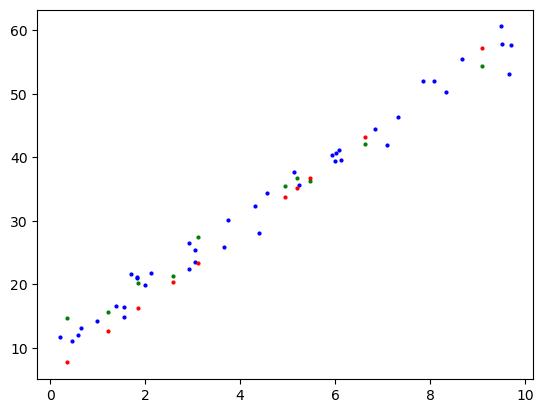

In [18]:
plt.scatter(X_train, y_train, c="b", s=4, label="Training data")
plt.scatter(X_test, y_test, c="g", s=4, label="Testing data")
plt.scatter(X_test, y_preds, c="r", s=4, label="Predictions")
plt.show()